In [4]:
import os 
import pandas as pd
import numpy as np
os.getcwd()
os.chdir("C:\Sameh\Dana")

In [5]:
import pandas as pd
dfCases=pd.read_excel("DataAll6June.xlsx",parse_dates=["Date"],index_col='Date')

In [6]:
dfUAEcases=pd.DataFrame(dfCases[['New Cases']])

In [7]:
dfUAEcases.dropna()

,New Cases
Date,
2020-01-29,4.0
2020-01-30,0.0
2020-01-31,0.0
2020-02-01,0.0
2020-02-02,1.0
...,...
2021-05-20,1401.0
2021-05-21,1490.0
2021-05-22,1596.0


<AxesSubplot:xlabel='Date'>

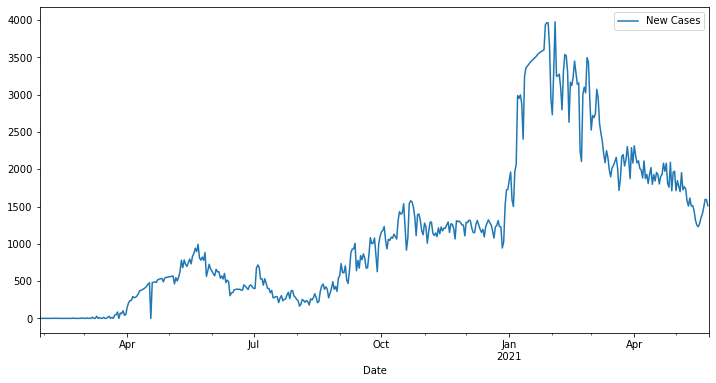

In [8]:
dfUAEcases.plot(figsize=(12,6))

In [3]:
dataToNormalize=dfUAEcases.iloc[:]
type(dataToNormalize)
#dataToNormalize=np.array(dataToNormalize['New Cases'])
#dfUAEcases.shape
dataToNormalize.shape

NameError: name 'dfUAEcases' is not defined

In [2]:
from sklearn.preprocessing import MinMaxScaler
scalar=MinMaxScaler()
scalar.fit(dataToNormalize)
normalizedData=scalar.transform(dataToNormalize)
normalizedData[1:10]


NameError: name 'dataToNormalize' is not defined

In [ ]:
from keras.preprocessing.sequence import TimeseriesGenerator
n_input=14
n_output=1
generator=TimeseriesGenerator(normalizedData,normalizedData,length=n_input,batch_size=1)

In [130]:
print(generator[10])

(array([[[0.00050289],
        [0.        ],
        [0.00025145],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.00025145],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ]]]), array([[0.00100578]]))


In [131]:
type(x)

numpy.ndarray

In [132]:
type(y)

numpy.ndarray

In [161]:
data=[]
target=[]
for i in range(len(generator)):
    data1,target1=generator[i]
    data2=np.transpose(data1[0])
    data.append(data1[0])
    xx=float(target1[0])
    print(data2)
    target.append(xx)

[[0.00100578 0.         0.         0.         0.00025145 0.
  0.         0.         0.         0.         0.00050289 0.
  0.00025145 0.        ]]
[[0.         0.         0.         0.00025145 0.         0.
  0.         0.         0.         0.00050289 0.         0.00025145
  0.         0.        ]]
[[0.         0.         0.00025145 0.         0.         0.
  0.         0.         0.00050289 0.         0.00025145 0.
  0.         0.        ]]
[[0.         0.00025145 0.         0.         0.         0.
  0.         0.00050289 0.         0.00025145 0.         0.
  0.         0.        ]]
[[0.00025145 0.         0.         0.         0.         0.
  0.00050289 0.         0.00025145 0.         0.         0.
  0.         0.        ]]
[[0.         0.         0.         0.         0.         0.00050289
  0.         0.00025145 0.         0.         0.         0.
  0.         0.00025145]]
[[0.         0.         0.         0.         0.00050289 0.
  0.00025145 0.         0.         0.         0.

In [162]:
data=np.array(data)
data.shape
#print(data[0])

(469, 14, 1)

In [163]:
target=np.array(target)
target.shape
#print(target[1:5])

(469,)

In [164]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(data,target,test_size=0.2,random_state=4)

In [165]:
y_test

array([0.        , 0.1410611 , 0.15388484, 0.09177772, 0.34171486,
       0.90294192, 0.17550918, 0.47347247, 0.        , 0.16092532,
       0.79632889, 0.53105356, 0.07643953, 0.83153131, 0.89992457,
       0.0450088 , 0.14282122, 0.54287151, 0.84536082, 0.10862459,
       0.16947448, 0.09429218, 0.        , 0.28187076, 0.30852401,
       0.32486799, 0.11315062, 0.66155394, 0.29192859, 0.31481016,
       0.32612522, 0.        , 0.76062359, 0.11566507, 0.        ,
       0.14156399, 0.07115917, 0.43625849,        nan, 0.12169977,
       0.27080714, 0.1443299 , 0.01030928, 0.52325874, 0.32260498,
       0.78526528, 0.1619311 , 0.62433995, 0.74402816, 0.09806387,
       0.88986673, 0.26778979, 0.23409605, 0.10937893, 0.01584109,
       0.39527282, 0.50842343, 0.10108122, 0.37465426, 0.12144833,
       0.06386724, 0.26301232, 0.30072919, 0.09756098, 1.        ,
       0.12044254, 0.81694745, 0.11289917, 0.1772693 , 0.3002263 ,
       0.27382449, 0.3155645 , 0.48478753, 0.25345738, 0.10007

In [166]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
import matplotlib.pyplot as plt

In [199]:
model=Sequential()

In [200]:
model.add(LSTM((1),batch_input_shape=(None,14,1),return_sequences=True))
model.add(LSTM((1),return_sequences=False))

In [201]:
model.compile(loss='mean_absolute_error',optimizer='adam',metrics=['accuracy'])

In [202]:
model.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_12 (LSTM)               (None, 14, 1)             12        
_________________________________________________________________
lstm_13 (LSTM)               (None, 1)                 12        
Total params: 24
Trainable params: 24
Non-trainable params: 0
_________________________________________________________________


In [203]:
print(x_train.shape)
print(y_train.shape)

(375, 14, 1)
(375,)


In [204]:
history=model.fit(x_train,y_train,epochs=400,validation_data=(x_test,y_test))

Epoch 1/400
12/12 [==============================] - 4s 85ms/step - loss: 0.2455 - accuracy: 0.0634 - val_loss: nan - val_accuracy: 0.0638
Epoch 2/400
12/12 [==============================] - 0s 10ms/step - loss: 0.2228 - accuracy: 0.0709 - val_loss: nan - val_accuracy: 0.0638
Epoch 3/400
12/12 [==============================] - 0s 9ms/step - loss: 0.1940 - accuracy: 0.0745 - val_loss: nan - val_accuracy: 0.0638
Epoch 4/400
12/12 [==============================] - 0s 8ms/step - loss: 0.1919 - accuracy: 0.0521 - val_loss: nan - val_accuracy: 0.0638
Epoch 5/400
12/12 [==============================] - 0s 9ms/step - loss: 0.1981 - accuracy: 0.0591 - val_loss: nan - val_accuracy: 0.0638
Epoch 6/400
12/12 [==============================] - 0s 9ms/step - loss: 0.1879 - accuracy: 0.0696 - val_loss: nan - val_accuracy: 0.0638
Epoch 7/400
12/12 [==============================] - 0s 8ms/step - loss: 0.1770 - accuracy: 0.0573 - val_loss: nan - val_accuracy: 0.0638
Epoch 8/400
12/12 [=============

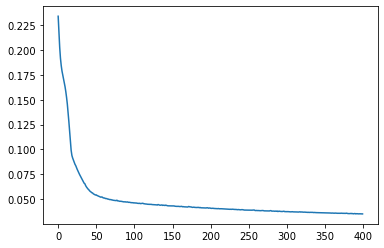

In [205]:
plt.plot(history.history['loss'])
plt.show()

94


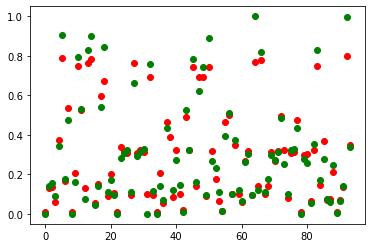

In [206]:
results=model.predict(x_test)
print(len(x_test))
plt.scatter(range(94),results,c='r')
plt.scatter(range(94),y_test,c='g')
plt.show()

In [1]:
resultsNotscaled=scalar.inverse_transform(results)

NameError: name 'scalar' is not defined